In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from apyori import apriori

# Merapikan dataset Mahasiswa

In [2]:
df = pd.read_csv('Dataset1_TranscriptMahasiswa.csv')
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310004,2010,1011,UM151,Agama,3,70.0,B
1,10110310008,2010,1011,UM151,Agama,3,71.0,B
2,10110310011,2010,1011,UM151,Agama,3,55.0,NaN
3,10110310013,2010,1011,UM151,Agama,3,73.0,B
4,10110310017,2010,1011,UM151,Agama,3,70.0,NaN


In [3]:
df.rename(
    columns=({'NILAI':'NILAI MAHASISWA'}),
    inplace =True
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIM              30870 non-null  int64  
 1   ANGKATAN         30870 non-null  int64  
 2   SEMESTER         30870 non-null  int64  
 3   KODE_MK          30870 non-null  object 
 4   NAMA_MK          30847 non-null  object 
 5   SKS              30870 non-null  int64  
 6   NILAI MAHASISWA  30858 non-null  float64
 7   GRADE            30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


# Menangani Missing Value dataset mahasiswa

In [5]:
df.isna().sum()

NIM                  0
ANGKATAN             0
SEMESTER             0
KODE_MK              0
NAMA_MK             23
SKS                  0
NILAI MAHASISWA     12
GRADE              552
dtype: int64

In [6]:
grade = []
for x in df["NILAI MAHASISWA"] :
    if x >= 85 and x <= 100:
        grade.append('A')
    elif x >= 80 and x < 85:
        grade.append('A-')
    elif x >= 75 and x < 80:
        grade.append('B+')
    elif x >= 70 and x < 75:
        grade.append('B')
    elif x >= 65 and x < 70:
        grade.append('B-')
    elif x >= 60 and x < 65:
        grade.append('C+')
    elif x >= 55 and x < 60:
        grade.append('C')
    elif x >= 45 and x < 55:
        grade.append('D')
    elif x >= 0 and x < 45:
        grade.append('E')
    else:
        grade.append('F')
df["GRADE"] = grade
df.head(15)

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI MAHASISWA,GRADE
0,10110310004,2010,1011,UM151,Agama,3,70.0,B
1,10110310008,2010,1011,UM151,Agama,3,71.0,B
2,10110310011,2010,1011,UM151,Agama,3,55.0,C
3,10110310013,2010,1011,UM151,Agama,3,73.0,B
4,10110310017,2010,1011,UM151,Agama,3,70.0,B
5,10110310022,2010,1011,UM151,Agama,3,73.0,B
6,10110310028,2010,1011,UM151,Agama,3,71.0,B
7,10110310032,2010,1011,UM151,Agama,3,70.0,B
8,10110310034,2010,1011,UM151,Agama,3,72.0,B
9,10110310036,2010,1011,UM151,Agama,3,74.0,B


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

NIM                0
ANGKATAN           0
SEMESTER           0
KODE_MK            0
NAMA_MK            0
SKS                0
NILAI MAHASISWA    0
GRADE              0
dtype: int64

# Menangani data duplikat dataset mahasiswa

In [9]:
df.shape

(30835, 8)

In [10]:
df.drop_duplicates()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI MAHASISWA,GRADE
0,10110310004,2010,1011,UM151,Agama,3,70.0,B
1,10110310008,2010,1011,UM151,Agama,3,71.0,B
2,10110310011,2010,1011,UM151,Agama,3,55.0,C
3,10110310013,2010,1011,UM151,Agama,3,73.0,B
4,10110310017,2010,1011,UM151,Agama,3,70.0,B
...,...,...,...,...,...,...,...,...
30865,33849,2018,1821,IS201,Proses Bisnis Korporat,3,0.0,E
30866,31749,2018,1822,IF100,Dasar-Dasar Pemrograman,3,6.0,E
30867,32081,2018,1822,IF100,Dasar-Dasar Pemrograman,3,78.0,B+
30868,32462,2018,1822,IF100,Dasar-Dasar Pemrograman,3,78.0,B+


# Mengatasi Outlier dataset mahasiswa

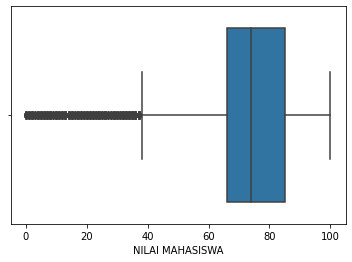

In [11]:
plt.figure() 
sns.boxplot(x=df['NILAI MAHASISWA'])
plt.show()

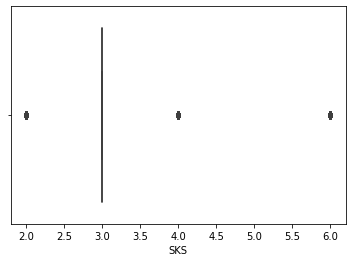

In [12]:
plt.figure() 
sns.boxplot(x=df['SKS'])
plt.show()

In [13]:
Q1 = (df[['NILAI MAHASISWA','SKS']]).quantile(0.25)
Q3 = (df[['NILAI MAHASISWA','SKS']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
more_than = df > maximum
less_than = df < minimum
df = df.mask(more_than, maximum,axis=1)
df = df.mask(less_than, minimum, axis=1)
print(df[['NILAI MAHASISWA','SKS']].describe())

C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_5156\352347709.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = df > maximum
C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_5156\352347709.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  less_than = df < minimum


       NILAI MAHASISWA      SKS
count     30835.000000  30835.0
mean         74.784968      3.0
std          14.229594      0.0
min          37.500000      3.0
25%          66.000000      3.0
50%          74.000000      3.0
75%          85.000000      3.0
max         100.000000      3.0


C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_5156\352347709.py:9: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df = df.mask(less_than, minimum, axis=1)


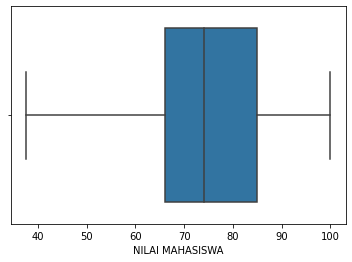

In [14]:
plt.figure() 
sns.boxplot(x=df['NILAI MAHASISWA'])
plt.show()

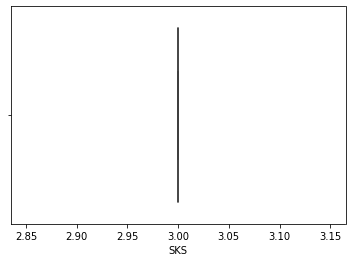

In [15]:
plt.figure() 
sns.boxplot(x=df['SKS'])
plt.show()

In [16]:
df.describe()

,NIM,ANGKATAN,SEMESTER,SKS,NILAI MAHASISWA
count,3.083500e+04,30835.000000,30835.000000,30835.0,30835.000000
mean,6.999361e+09,2013.854030,1514.502546,3.0,74.784968
std,6.150573e+09,2.418752,233.853829,0.0,14.229594
min,8.429000e+03,2010.000000,1011.000000,3.0,37.500000
25%,1.795300e+04,2012.000000,1321.000000,3.0,66.000000
50%,1.011031e+10,2014.000000,1521.000000,3.0,74.000000
75%,1.311031e+10,2016.000000,1721.000000,3.0,85.000000
max,1.411031e+10,2018.000000,1911.000000,3.0,100.000000


# K MEANS CLUSTERING

In [17]:
df.dtypes

NIM                  int64
ANGKATAN             int64
SEMESTER             int64
KODE_MK             object
NAMA_MK             object
SKS                  int64
NILAI MAHASISWA    float64
GRADE               object
dtype: object

In [18]:
#CARA VARIASI 2 NILAI DAN ANGKATAN
X = df.iloc[:, [6, 1]].values
print(X)

[[  70. 2010.]
 [  71. 2010.]
 [  55. 2010.]
 ...
 [  78. 2018.]
 [  78. 2018.]
 [  78. 2018.]]


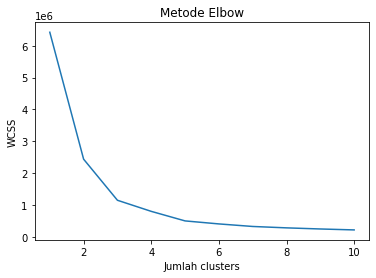

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

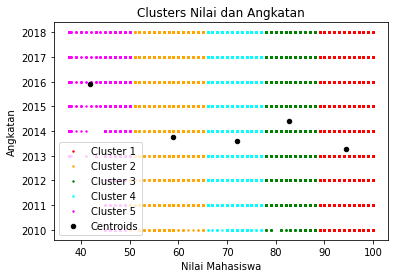

In [62]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 2, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 2, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 2, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 2, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters Nilai dan Angkatan')
plt.xlabel('Nilai Mahasiswa')
plt.ylabel('Angkatan')
plt.legend()
plt.show()

In [63]:
score = silhouette_score(X, kmeans.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.510


In [65]:
db_index = davies_bouldin_score(X, y_kmeans)
print('Davies-Bouldin Index: %.3f' % db_index)

Davies-Bouldin Index: 0.595


In [29]:
#CARA 1 VARIASI NILAI
Z = df.iloc[:, [6]].values
print(Z)

[[70.]
 [71.]
 [55.]
 ...
 [78.]
 [78.]
 [78.]]


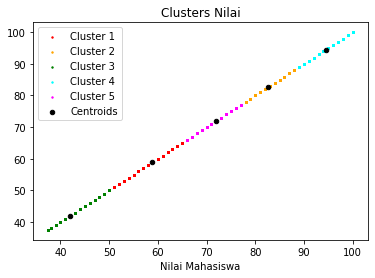

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0], s = 2, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1], s = 2, c = 'orange', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2], s = 2, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3], s = 2, c = 'cyan', label = 'Cluster 4')
plt.scatter(Z[y_kmeans == 4, 0], Z[y_kmeans == 4], s = 2, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:], kmeans.cluster_centers_[:], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters Nilai')
plt.xlabel('Nilai Mahasiswa')
plt.legend()
plt.show()

In [31]:
score = silhouette_score(Z, kmeans.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.607


In [66]:
db_index = davies_bouldin_score(Z, y_kmeans)
print('Davies-Bouldin Index: %.3f' % db_index)

Davies-Bouldin Index: 0.458


In [32]:
df["NAMA_MK"] = df["NAMA_MK"].astype("category")
df.dtypes

NIM                   int64
ANGKATAN              int64
SEMESTER              int64
KODE_MK              object
NAMA_MK            category
SKS                   int64
NILAI MAHASISWA     float64
GRADE                object
dtype: object

In [33]:
df["NAMA_MK"] = df["NAMA_MK"].cat.rename_categories([1,2,3,4,5,6,7,8,9,10,
                                                     11,12,13,14,15,16,17,18,19,20,
                                                     21,22,23,24,25,26,27,28,29,30,
                                                     31,32,33,34,35,36,37,38,39,40,
                                                     41,42,43,44,45,46,47,48,49,50,
                                                     51,52,53,54,55,56,57,58,59,60,
                                                     61,62,63,64,65,66,67,68,69,70,
                                                     71,72,73,74,75,76,77,78,79,80,
                                                     81,82,83,84,85,86,87,88,89,90,
                                                     91,92,93,94,95,96,97,98,99,100,
                                                     101,102,103,104,105,106,107,108,109,110,
                                                     111,112,113,114,115,116,117,118,119,120,
                                                     121,122,123,124,125,126,127,128,129,130,
                                                     131,132,133,134,135,136,137,138,139,140,
                                                     141,142,143,144,145,146,147,148,149,150,
                                                     151,152,153,154,155,156,157,158,159,160,
                                                     161,162,163,164,165,166,167,168,169,170,
                                                     171,172,173,174,175,176,177,178,179,180,181,182])

In [34]:
df["NAMA_MK"].head()

0    58
1    58
2    58
3    58
4    58
Name: NAMA_MK, dtype: category
Categories (182, int64): [1, 2, 3, 4, ..., 179, 180, 181, 182]

In [35]:
#CARA VARIASI 3 NILAI DAN NAMA_MK
A = df.iloc[:, [6, 4]].values
print(A)

[[70. 58.]
 [71. 58.]
 [55. 58.]
 ...
 [78. 78.]
 [78. 78.]
 [78. 78.]]


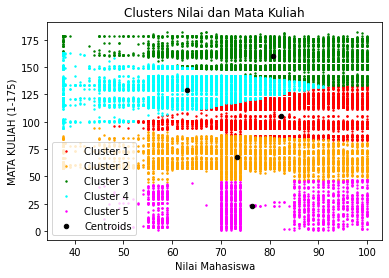

In [78]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(A)
plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1], s = 2, c = 'red', label = 'Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1], s = 2, c = 'orange', label = 'Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1], s = 2, c = 'green', label = 'Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4')
plt.scatter(A[y_kmeans == 4, 0], A[y_kmeans == 4, 1], s = 2, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters Nilai dan Mata Kuliah')
plt.xlabel('Nilai Mahasiswa')
plt.ylabel('MATA KULIAH (1-175)')
plt.legend()
plt.show()

In [79]:
score = silhouette_score(A, kmeans.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.415


In [80]:
db_index = davies_bouldin_score(A, y_kmeans)
print('Davies-Bouldin Index: %.3f' % db_index)

Davies-Bouldin Index: 0.830


# Korelasi Dataset1 dan dataset 2

In [82]:
df_1 = pd.DataFrame({
   'Semester':df['SEMESTER'],
   'Nama_MK':df['NAMA_MK'],
   'Nilai Mahasiswa':df['NILAI MAHASISWA']
})
df_1.head()

,Semester,Nama_MK,Nilai Mahasiswa
0,1011,58,70.0
1,1011,58,71.0
2,1011,58,55.0
3,1011,58,73.0
4,1011,58,70.0


In [83]:
df_2 = pd.DataFrame({
   'Semester':df1['SEMESTER'],
   'Nilai Survey':df1['NILAI SURVEY'],
})
df_2.head()

,Semester,Nilai Survey
0,1511,3.27
1,1511,3.09
2,1511,3.17
3,1511,3.21
4,1511,3.18


In [84]:
merge_df_left = pd.merge(left=df_1, right=df_2, how='left', left_on='Semester', right_on='Semester')
merge_df_left.head()

,Semester,Nama_MK,Nilai Mahasiswa,Nilai Survey
0,1011,58,70.0,NaN
1,1011,58,71.0,NaN
2,1011,58,55.0,NaN
3,1011,58,73.0,NaN
4,1011,58,70.0,NaN


In [85]:
merge_df_left["Nama_MK"] = merge_df_left["Nama_MK"].astype("int64")
merge_df_left.head()

,Semester,Nama_MK,Nilai Mahasiswa,Nilai Survey
0,1011,58,70.0,NaN
1,1011,58,71.0,NaN
2,1011,58,55.0,NaN
3,1011,58,73.0,NaN
4,1011,58,70.0,NaN


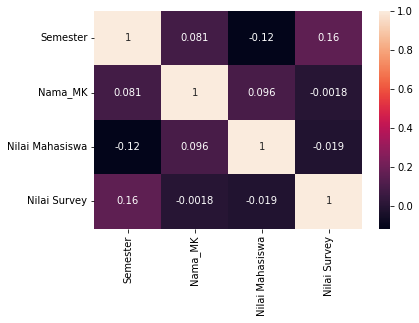

In [47]:
sns.heatmap(merge_df_left.corr(),annot=True)
plt.show()

# Merapikan dataset dosen

In [38]:
df1 = pd.read_csv('Dataset2_EvaluasiDosenPerMK.csv', decimal=',')
df1.rename(
    columns=({'NILAI':'NILAI SURVEY'}),
    inplace =True
    
)
df1.head()

,TAHUN,SEMESTER,MATAKULIAH,NILAI SURVEY
0,2015,1511,Sistem Informasi Manajemen,3.27
1,2015,1511,Matematika Bisnis,3.09
2,2015,1511,Proses Bisnis Korporat,3.17
3,2015,1511,Algoritma dan Pemrograman,3.21
4,2015,1511,Konsep Sistem Operasi,3.18


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TAHUN         151 non-null    int64 
 1   SEMESTER      151 non-null    int64 
 2   MATAKULIAH    151 non-null    object
 3   NILAI SURVEY  151 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.8+ KB


# Menangani Missing Value dosen

In [40]:
df1.isna().sum()

TAHUN           0
SEMESTER        0
MATAKULIAH      0
NILAI SURVEY    0
dtype: int64

# Menangani data duplikat dataset dosen

In [41]:
df1.shape

(151, 4)

In [42]:
df1.drop_duplicates()

,TAHUN,SEMESTER,MATAKULIAH,NILAI SURVEY
0,2015,1511,Sistem Informasi Manajemen,3.27
1,2015,1511,Matematika Bisnis,3.09
2,2015,1511,Proses Bisnis Korporat,3.17
3,2015,1511,Algoritma dan Pemrograman,3.21
4,2015,1511,Konsep Sistem Operasi,3.18
...,...,...,...,...
146,2018,1821,Metode Riset Sistem Informasi,3.22
147,2018,1821,Audit Sistem Informasi,3.37
148,2018,1821,Tata Kelola Teknologi Informasi 2,3.32
149,2018,1821,Sistem & Aplikasi Perusahaan 2,3.59


# Mengatasi Outlier dataset dosen

In [43]:
df1["NILAI SURVEY"] = df1["NILAI SURVEY"].astype("float")

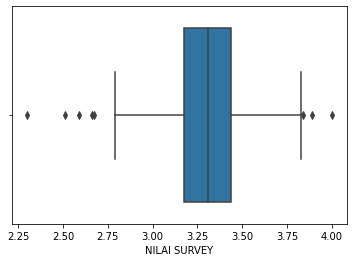

In [44]:
plt.figure() 
sns.boxplot(x=df1['NILAI SURVEY'])
plt.show()

In [45]:
Q1 = (df1[['NILAI SURVEY']]).quantile(0.25)
Q3 = (df1[['NILAI SURVEY']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
more_than = df1 > maximum
less_than = df1 < minimum
df1 = df1.mask(more_than, maximum,axis=1)
df1 = df1.mask(less_than, minimum, axis=1)
print(df1[['NILAI SURVEY']].describe())

       NILAI SURVEY
count    151.000000
mean       3.315430
std        0.231123
min        2.777500
25%        3.175000
50%        3.310000
75%        3.440000
max        3.837500


C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_5156\3746329393.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = df1 > maximum
C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_5156\3746329393.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  less_than = df1 < minimum


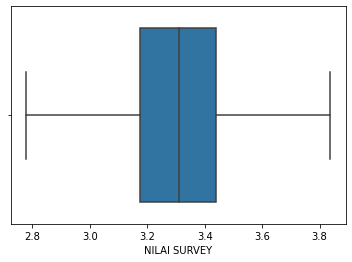

In [46]:
plt.figure() 
sns.boxplot(x=df1['NILAI SURVEY'])
plt.show()

In [47]:
df1.describe()

,TAHUN,SEMESTER,NILAI SURVEY
count,151.000000,151.000000,151.000000
mean,2016.496689,1665.966887,3.315430
std,1.165471,116.955115,0.231123
min,2015.000000,1511.000000,2.777500
25%,2015.000000,1521.000000,3.175000
50%,2016.000000,1621.000000,3.310000
75%,2018.000000,1811.000000,3.440000
max,2018.000000,1821.000000,3.837500


# Menentukan K Means

In [69]:
C = df1.iloc[:, [3]].values
print(C)

[[3.27  ]
 [3.09  ]
 [3.17  ]
 [3.21  ]
 [3.18  ]
 [3.26  ]
 [2.99  ]
 [3.34  ]
 [3.32  ]
 [3.54  ]
 [3.12  ]
 [3.35  ]
 [3.3   ]
 [3.08  ]
 [3.41  ]
 [3.3   ]
 [3.58  ]
 [3.27  ]
 [3.63  ]
 [3.52  ]
 [3.28  ]
 [2.96  ]
 [3.3   ]
 [3.05  ]
 [3.01  ]
 [3.17  ]
 [3.6   ]
 [3.11  ]
 [3.08  ]
 [2.96  ]
 [3.09  ]
 [3.04  ]
 [3.47  ]
 [3.45  ]
 [3.7   ]
 [3.48  ]
 [3.24  ]
 [3.23  ]
 [3.38  ]
 [3.53  ]
 [3.15  ]
 [3.36  ]
 [3.66  ]
 [2.7775]
 [3.3   ]
 [3.31  ]
 [3.13  ]
 [3.36  ]
 [2.97  ]
 [3.35  ]
 [3.2   ]
 [3.24  ]
 [3.04  ]
 [3.37  ]
 [3.24  ]
 [3.33  ]
 [3.32  ]
 [3.28  ]
 [3.43  ]
 [3.12  ]
 [3.37  ]
 [3.44  ]
 [3.1   ]
 [3.21  ]
 [2.7775]
 [3.35  ]
 [3.67  ]
 [3.25  ]
 [3.23  ]
 [2.7775]
 [3.05  ]
 [3.16  ]
 [2.7775]
 [3.77  ]
 [3.79  ]
 [2.96  ]
 [3.79  ]
 [3.8   ]
 [3.83  ]
 [2.79  ]
 [3.8375]
 [3.31  ]
 [3.    ]
 [3.43  ]
 [3.8375]
 [3.29  ]
 [3.38  ]
 [3.22  ]
 [3.48  ]
 [3.19  ]
 [3.42  ]
 [3.35  ]
 [3.62  ]
 [3.3   ]
 [3.22  ]
 [3.15  ]
 [3.22  ]
 [3.38  ]
 [3.4   ]
 [3.47  ]


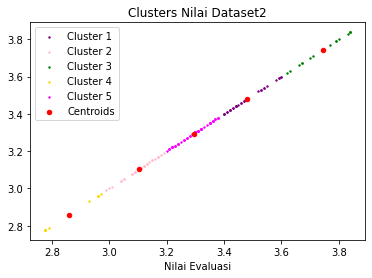

In [70]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(C)
plt.scatter(C[y_kmeans == 0,0], C[y_kmeans == 0], s = 2, c = 'purple', label = 'Cluster 1')
plt.scatter(C[y_kmeans == 1,0], C[y_kmeans == 1], s = 2, c = 'pink', label = 'Cluster 2')
plt.scatter(C[y_kmeans == 2,0], C[y_kmeans == 2], s = 2, c = 'green', label = 'Cluster 3')
plt.scatter(C[y_kmeans == 3,0], C[y_kmeans == 3], s = 2, c = 'gold', label = 'Cluster 4')
plt.scatter(C[y_kmeans == 4,0], C[y_kmeans == 4], s = 2, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:], kmeans.cluster_centers_[:], s = 20, c = 'red', label = 'Centroids')
plt.title('Clusters Nilai Dataset2')
plt.xlabel('Nilai Evaluasi')
plt.legend()
plt.show()

In [71]:
score = silhouette_score(C, kmeans.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.542


In [72]:
db_index = davies_bouldin_score(C, y_kmeans)
print('Davies-Bouldin Index: %.3f' % db_index)

Davies-Bouldin Index: 0.520


In [50]:
df1["MATAKULIAH"] = df1["MATAKULIAH"].astype("category")
df1.dtypes

TAHUN              int64
SEMESTER           int64
MATAKULIAH      category
NILAI SURVEY     float64
dtype: object

In [51]:
df1["MATAKULIAH"].head()

0     Sistem Informasi Manajemen
1              Matematika Bisnis
2         Proses Bisnis Korporat
3      Algoritma dan Pemrograman
4          Konsep Sistem Operasi
Name: MATAKULIAH, dtype: category
Categories (56, object): [' Business Intelligence', ' Data Analysis', ' Data Mining', ' Datawarehouse', ..., 'Topik Lanjut Sistem Informasi 1', 'Topik Lanjut Sistem Informasi 2', 'Web Design and Development', 'iOS Programming 1']

In [52]:
df1["MATAKULIAH"] = df1["MATAKULIAH"].cat.rename_categories([1,2,3,4,5,6,7,8,9,10,
                                                             11,12,13,14,15,16,17,18,19,20,
                                                             21,22,23,24,25,26,27,28,29,30,
                                                             31,32,33,34,35,36,37,38,39,40,
                                                             41,42,43,44,45,46,47,48,49,50,
                                                             51,52,53,54,55,56])

In [74]:
#CARA VARIASI 3 NILAI DAN MATA KULIAH
D = df1.iloc[:, [3,2]].values
print(D)

[[ 3.27    9.    ]
 [ 3.09   32.    ]
 [ 3.17   40.    ]
 [ 3.21   13.    ]
 [ 3.18   29.    ]
 [ 3.26   15.    ]
 [ 2.99   46.    ]
 [ 3.34   25.    ]
 [ 3.32   16.    ]
 [ 3.54   36.    ]
 [ 3.12   30.    ]
 [ 3.35   48.    ]
 [ 3.3    21.    ]
 [ 3.08   49.    ]
 [ 3.41   43.    ]
 [ 3.3    17.    ]
 [ 3.58   52.    ]
 [ 3.27   54.    ]
 [ 3.63   12.    ]
 [ 3.52    8.    ]
 [ 3.28   45.    ]
 [ 2.96   40.    ]
 [ 3.3    28.    ]
 [ 3.05   13.    ]
 [ 3.01   39.    ]
 [ 3.17   26.    ]
 [ 3.6    38.    ]
 [ 3.11   25.    ]
 [ 3.08   16.    ]
 [ 2.96   35.    ]
 [ 3.09   36.    ]
 [ 3.04   22.    ]
 [ 3.47   24.    ]
 [ 3.45   41.    ]
 [ 3.7    11.    ]
 [ 3.48   42.    ]
 [ 3.24   33.    ]
 [ 3.23   50.    ]
 [ 3.38   44.    ]
 [ 3.53   47.    ]
 [ 3.15   32.    ]
 [ 3.36   40.    ]
 [ 3.66   39.    ]
 [ 2.7775 29.    ]
 [ 3.3    15.    ]
 [ 3.31   46.    ]
 [ 3.13   30.    ]
 [ 3.36   36.    ]
 [ 2.97   34.    ]
 [ 3.35   56.    ]
 [ 3.2    48.    ]
 [ 3.24   21.    ]
 [ 3.04   23

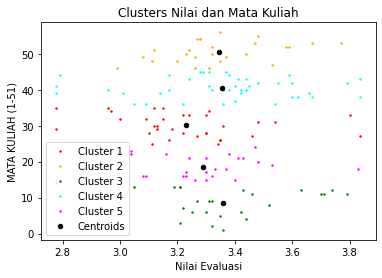

In [75]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(D)
plt.scatter(D[y_kmeans == 0, 0], D[y_kmeans == 0, 1], s = 2, c = 'red', label = 'Cluster 1')
plt.scatter(D[y_kmeans == 1, 0], D[y_kmeans == 1, 1], s = 2, c = 'orange', label = 'Cluster 2')
plt.scatter(D[y_kmeans == 2, 0], D[y_kmeans == 2, 1], s = 2, c = 'green', label = 'Cluster 3')
plt.scatter(D[y_kmeans == 3, 0], D[y_kmeans == 3, 1], s = 2, c = 'cyan', label = 'Cluster 4')
plt.scatter(D[y_kmeans == 4, 0], D[y_kmeans == 4, 1], s = 2, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters Nilai dan Mata Kuliah')
plt.xlabel('Nilai Evaluasi')
plt.ylabel('MATA KULIAH (1-51)')
plt.legend()
plt.show()

In [76]:
score = silhouette_score(D, kmeans.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.546


In [77]:
db_index = davies_bouldin_score(D, y_kmeans)
print('Davies-Bouldin Index: %.3f' % db_index)

Davies-Bouldin Index: 0.525


# Algoritma Apriori

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   TAHUN         151 non-null    int64   
 1   SEMESTER      151 non-null    int64   
 2   MATAKULIAH    151 non-null    category
 3   NILAI SURVEY  151 non-null    float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 6.3 KB


In [54]:
df1['Items']=df1['TAHUN'].astype(str)+','+df1['SEMESTER'].astype(str)+','+df1['MATAKULIAH'].astype(str)+','+df1['NILAI SURVEY'].astype(str)
df1['Items'].head()

0     2015,1511,9,3.27
1    2015,1511,32,3.09
2    2015,1511,40,3.17
3    2015,1511,13,3.21
4    2015,1511,29,3.18
Name: Items, dtype: object

In [55]:
df_new1 = df1.drop(['TAHUN','SEMESTER','MATAKULIAH','NILAI SURVEY'],axis=1)
df_new1

,Items
0,"2015,1511,9,3.27"
1,"2015,1511,32,3.09"
2,"2015,1511,40,3.17"
3,"2015,1511,13,3.21"
4,"2015,1511,29,3.18"
...,...
146,"2018,1821,33,3.22"
147,"2018,1821,18,3.37"
148,"2018,1821,50,3.32"
149,"2018,1821,44,3.59"


In [56]:
records = []
for i in range(df_new1.shape[0]):
    records.append([str(df_new1.values[i,j]).split(',') for j in range(df_new1.shape[1])])

trx = [[] for trx in range(len(records))]
for i in range(len(records)):
    for j in records[i][0]:
        trx[i].append(j)
trx

[['2015', '1511', '9', '3.27'],
 ['2015', '1511', '32', '3.09'],
 ['2015', '1511', '40', '3.17'],
 ['2015', '1511', '13', '3.21'],
 ['2015', '1511', '29', '3.18'],
 ['2015', '1511', '15', '3.26'],
 ['2015', '1511', '46', '2.99'],
 ['2015', '1511', '25', '3.34'],
 ['2015', '1511', '16', '3.32'],
 ['2015', '1511', '36', '3.54'],
 ['2015', '1511', '30', '3.12'],
 ['2015', '1511', '48', '3.35'],
 ['2015', '1511', '21', '3.3'],
 ['2015', '1511', '49', '3.08'],
 ['2015', '1511', '43', '3.41'],
 ['2015', '1511', '17', '3.3'],
 ['2015', '1511', '52', '3.58'],
 ['2015', '1511', '54', '3.27'],
 ['2015', '1511', '12', '3.63'],
 ['2015', '1511', '8', '3.52'],
 ['2015', '1511', '45', '3.28'],
 ['2015', '1521', '40', '2.96'],
 ['2015', '1521', '28', '3.3'],
 ['2015', '1521', '13', '3.05'],
 ['2015', '1521', '39', '3.01'],
 ['2015', '1521', '26', '3.17'],
 ['2015', '1521', '38', '3.6'],
 ['2015', '1521', '25', '3.11'],
 ['2015', '1521', '16', '3.08'],
 ['2015', '1521', '35', '2.96'],
 ['2015', '1521'

In [57]:
association_rules = apriori(trx, min_support=0.14, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(len(association_results))

2


In [58]:
pd.set_option('max_colwidth', 1000)
Result=pd.DataFrame(columns=['Rule','Support','Confidence'])
for item in association_results:
    pair = item[2]
    for i in pair:
        items = str([x for x in i[0]])
        if i[3]!=1:
            Result=Result.append({
                'Rule':str([x for x in i[0]])+ " -> " +str([x for x in i[1]]),
                'Support':str(round(item[1]*100,2))+'%',
                'Confidence':str(round(i[2] *100,2))+'%'
                },ignore_index=True)
Result

C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_1652\416014087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({
C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_1652\416014087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({
C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_1652\416014087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({
C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_1652\416014087.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({


,Rule,Support,Confidence
0,['1611'] -> ['2016'],14.57%,100.0%
1,['2016'] -> ['1611'],14.57%,52.38%
2,['1811'] -> ['2018'],15.23%,100.0%
3,['2018'] -> ['1811'],15.23%,52.27%
